In [61]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import warnings as wn
wn.filterwarnings('ignore')

In [62]:
bank=pd.read_csv('bank-full.csv',sep=";")

In [63]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [64]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [65]:
bank.shape

(45211, 17)

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
label_encoder=LabelEncoder()

In [68]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [69]:
X=bank.iloc[:,0:16]
Y=bank.iloc[:,-1]

In [70]:
X=pd.get_dummies(X)

In [71]:
Y=label_encoder.fit_transform(Y)

In [72]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [73]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [74]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [75]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [76]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [77]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39129   793]
 [ 4079  1210]]


In [87]:
(39129+1210)/(39129+793+4079+1210)

0.8922386144964721

In [88]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.60      0.23      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.64     45211
weighted avg       0.87      0.89      0.87     45211



In [120]:
classifier.predict_proba(X)[:,1]

array([0.03568741, 0.02131017, 0.01776483, ..., 0.68978991, 0.08630383,
       0.13776078])

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(Y,y_pred)
accuracy_score

0.8922386144964721

In [82]:
#ROC Curve

In [111]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [107]:
auc=roc_auc_score(Y,y_pred)
auc

0.6044564860449326

Text(0, 0.5, 'True Positive Rate')

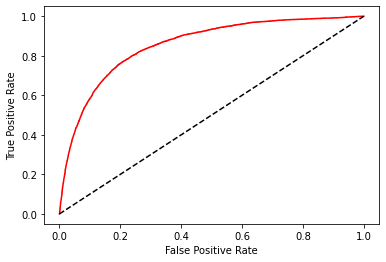

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

fpr,tpr,thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,color='Red',label='LogitModel area%0.2f'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [125]:
thresholds

array([1.99999983e+00, 9.99999834e-01, 9.99990148e-01, ...,
       8.70497764e-07, 8.61336090e-07, 1.92375257e-15])